In [1]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return x**2-4*x+7+np.random.normal(0,4,x.shape[0])
x=np.linspace(0,20,500)
y=f(x)
X=x=x.reshape([x.shape[0],1])
for i in range(2,3):
    X=np.concatenate([X,x**i],axis=1)
X = np.hstack([X, np.ones_like(x)])
theta = np.random.random(X.shape[1])
print(X)

[[0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [4.00801603e-02 1.60641925e-03 1.00000000e+00]
 [8.01603206e-02 6.42567701e-03 1.00000000e+00]
 ...
 [1.99198397e+01 3.96800013e+02 1.00000000e+00]
 [1.99599198e+01 3.98398400e+02 1.00000000e+00]
 [2.00000000e+01 4.00000000e+02 1.00000000e+00]]
[[0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [4.00801603e-02 1.60641925e-03 1.00000000e+00]
 [8.01603206e-02 6.42567701e-03 1.00000000e+00]
 ...
 [1.99198397e+01 3.96800013e+02 1.00000000e+00]
 [1.99599198e+01 3.98398400e+02 1.00000000e+00]
 [2.00000000e+01 4.00000000e+02 1.00000000e+00]]


In [3]:
def calculate_loss(X, y, theta):
    result=X.dot(theta)
    difference=X.dot(theta)-y
    N=y.shape[0]
    loss = np.mean(difference**2)/2
    return loss
def calculate_gradients(X, y, theta):
    theta_gradients = np.zeros_like(theta)
    theta_gradients = X.T.dot(X.dot(theta)-y)/y.shape[0]
    return theta_gradients
def make_gradient_step(theta, theta_gradients, alpha):
    theta-= theta_gradients*alpha
    return theta

Ошибка после случайной инициализации:  680.3406667323896
Ошибка после градиентного спуска:  10.355704809266085
[-2.62396598  0.94299187  0.2114251 ]
Ошибка после случайной инициализации:  680.3406667323896
Ошибка после градиентного спуска:  10.355704809266085
[-2.62396598  0.94299187  0.2114251 ]


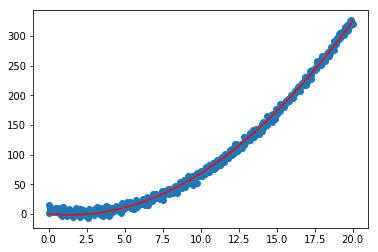

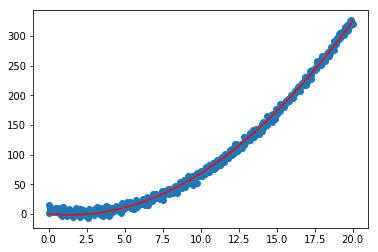

In [8]:
alpha = 0.00001
theta = np.random.random(X.shape[1])
start_loss = calculate_loss(X, y, theta)
loss1=start_loss+1000
loss2=start_loss
while loss1-loss2>0.00001:
    theta_gradients = calculate_gradients(X, y, theta)
    theta = make_gradient_step(theta, theta_gradients, alpha)
    loss1,loss2=loss2, calculate_loss(X,y,theta)
    
end_loss = calculate_loss(X, y, theta)
plt.scatter(x,y)
plt.plot(x, X.dot(theta), c = 'r')

#Смотрим как поменялась ошибка
print("Ошибка после случайной инициализации: ", start_loss)
print("Ошибка после градиентного спуска: ", end_loss)
print(theta)